#  Stock Market Data From Yahoo Finance

### Introduction

Stock Market Analysis and Prediction focuses on tehcnical analysis, visualization and prediction using data from Yahoo Finance. I chose some of the most promient stocks in 2023. I used pandas to get stock information, matplotlib for visualization, and seaborn for risk prediction. 

### Questions

In this analysis, I explore the following questions.

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
5. What was the correlation between different stocks' daily returns?


In [1]:
# For Data Processing
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
#For reading stock data from yahoo
from pandas_datareader import data as pdr
#from pandas_datareader import DataReader
pd.core.common.is_list_like = pd.api.types.is_list_like
import yfinance as yf
yf.pdr_override()

#For time stamps
from datetime import datetime

#for division
from __future__ import division

### Section 1 - Reading Stock Data

In this section, I will request stock information and analyze  basic attributes. 

In [4]:
# Set up Start and End time for data grab
start_date = datetime(2022,1,1)
end_date = datetime(2023,3,1)

# List of stock tickers for analytics
tickers = ['GOOGL', 'AMZN', 'MSFT', 'AAPL', 'NVDA']

#Since yfiance is having issues with pandas_datareader, I downloaded the tickers using yf.download
for ticker in tickers:
    globals()[ticker] = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,180.683868,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,178.390701,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,173.645538,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,170.746811,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.915573,86709100


In [6]:
AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume
count,290.000000,290.000000,290.000000,290.000000,290.000000,2.900000e+02
mean,122.268303,124.322254,119.987211,122.139116,122.139116,7.580744e+07
std,24.601520,24.770600,24.285087,24.497463,24.497463,3.283418e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,3.508860e+07
25%,101.162502,102.839998,98.187498,100.882502,100.882502,5.577585e+07
50%,117.144997,119.434998,114.775002,116.884998,116.884998,6.718355e+07
75%,142.887497,145.125000,140.360004,143.057495,143.057495,8.491922e+07
max,170.438004,171.399994,167.868500,170.404495,170.404495,2.726620e+08


In [7]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 290 entries, 2022-01-03 to 2023-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       290 non-null    float64
 1   High       290 non-null    float64
 2   Low        290 non-null    float64
 3   Close      290 non-null    float64
 4   Adj Close  290 non-null    float64
 5   Volume     290 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 15.9 KB


<AxesSubplot:xlabel='Date'>

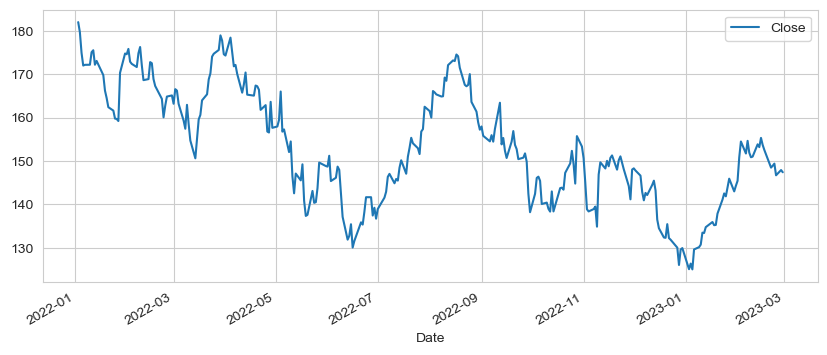

In [8]:
# The historical view of the closing price
AAPL['Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

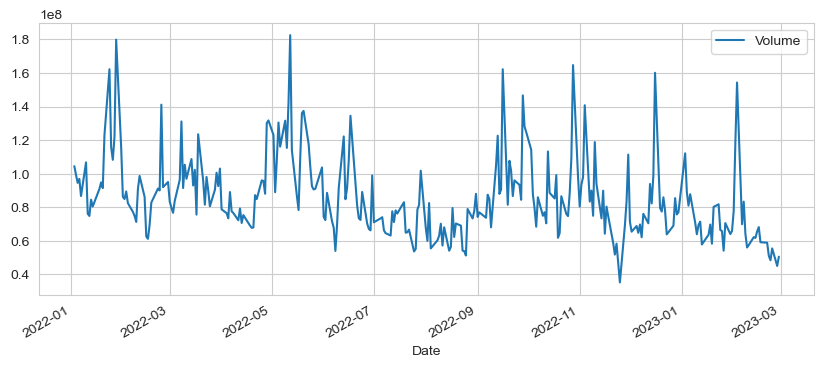

In [9]:
# Now let's plot the total volume of stock being traded each day over the past year
AAPL['Volume'].plot(legend=True, figsize=(10,4))

AAPL stock had the highest volume on 2022-05.



Now, I will caculate the moving average for the AAPL stock.

In [10]:
# Let's go ahead and plot out APPL 50 day moving average.
MA_day = [10,20,50,100]
for  ma in MA_day:
    column_name = 'MA for %s days' %(str(ma))
    AAPL[column_name] = pd.Series.rolling(AAPL['Close'], window=20).mean()

<AxesSubplot:xlabel='Date'>

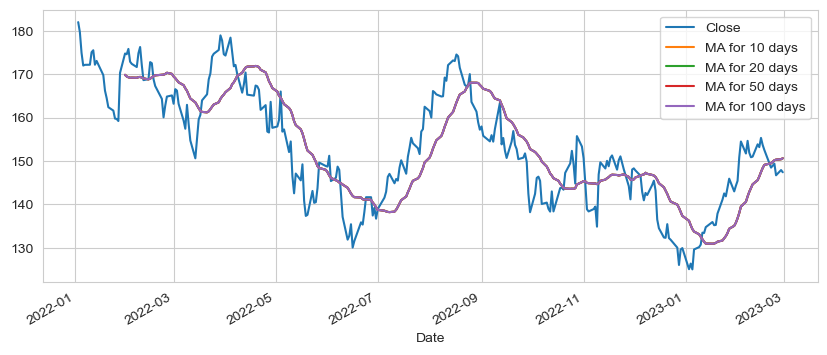

In [11]:
AAPL[['Close','MA for 10 days', 'MA for 20 days', 'MA for 50 days', 'MA for 100 days']].plot(subplots=False,figsize=(10,4))

### Section 2 - Daily Report Analysis

Using pandas I will retrieve the daily returns for the APPL stock

<AxesSubplot:xlabel='Date'>

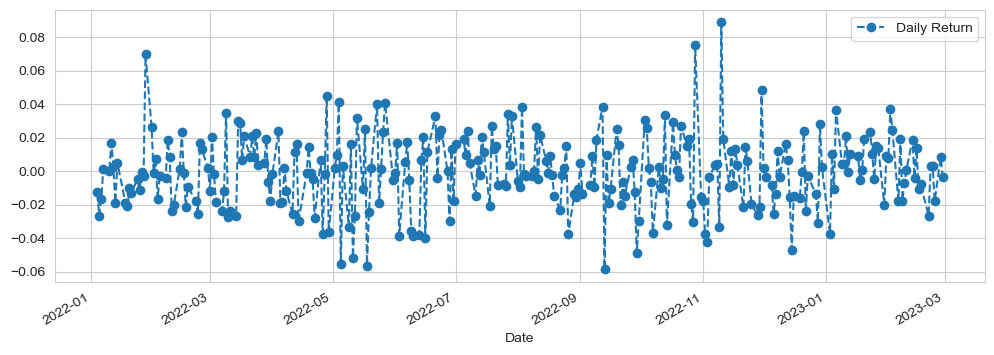

In [12]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return'] = AAPL['Close'].pct_change()

# Let's plot the daily return percentenge
AAPL['Daily Return'].plot(figsize=(12,4), legend=True,linestyle='--', marker='o')

Next, I will get an overall look at the average daily return using a histogram. By using seaborn to create both a histogram and kde plot on the same figure.

<AxesSubplot:>

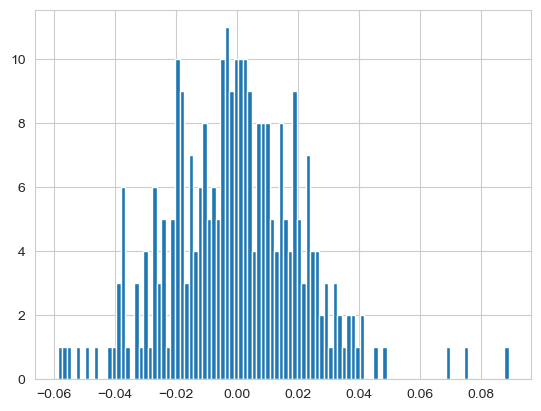

In [13]:
# only with histogram
AAPL['Daily Return'].hist(bins=100)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

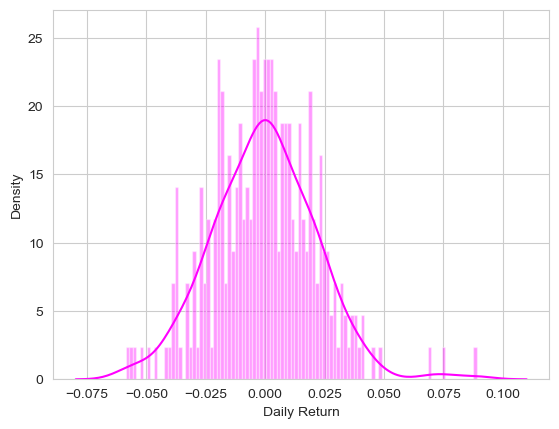

In [14]:
#Note the use of dropna(). NaN values can't be read by seaborn
sns. distplot(AAPL['Daily Return'].dropna(), bins =100, color='magenta')

Now, I will analyze the return of all the stocks in our list. 

In [15]:
closingprice_df = pdr.get_data_yahoo(tickers, start_date, end_date)['Close']



[*********************100%***********************]  5 of 5 completed


In [16]:
closingprice_df.head()

,AAPL,AMZN,GOOGL,MSFT,NVDA
Date,,,,,
2022-01-03,182.009995,170.404495,144.991501,334.750000,301.209991
2022-01-04,179.699997,167.522003,144.399506,329.010010,292.899994
2022-01-05,174.919998,164.356995,137.774994,316.380005,276.040009
2022-01-06,172.000000,163.253998,137.747498,313.880005,281.779999
2022-01-07,172.169998,162.554001,137.016998,314.040009,272.470001


Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the APPL stock.



In [17]:
tech_returns = closingprice_df.pct_change()
tech_returns.head()

,AAPL,AMZN,GOOGL,MSFT,NVDA
Date,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN
2022-01-04,-0.012692,-0.016916,-0.004083,-0.017147,-0.027589
2022-01-05,-0.026600,-0.018893,-0.045876,-0.038388,-0.057562
2022-01-06,-0.016693,-0.006711,-0.000200,-0.007902,0.020794
2022-01-07,0.000988,-0.004288,-0.005303,0.000510,-0.033040


Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a stock compared to itself.

GOOGL is a Alphabet Inc Class A Stock.

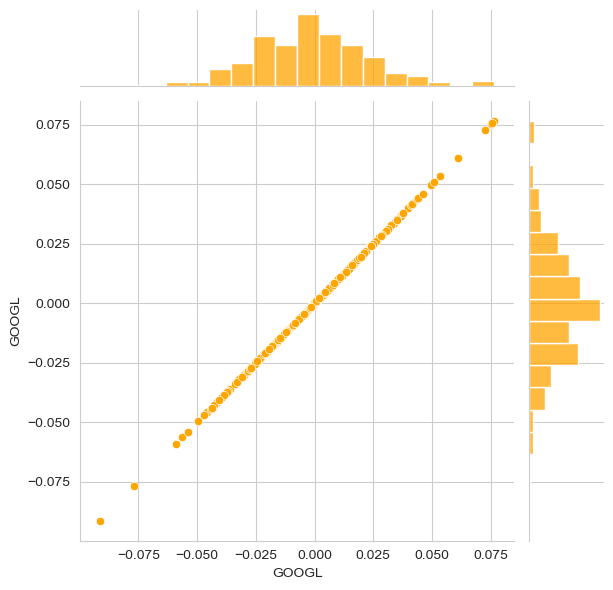

In [18]:
#comparing Google to itself should show a perfectly linear relationship
sns.jointplot(data=tech_returns, x='GOOGL', y='GOOGL',kind='scatter',color='orange')



Now I will compare Google and Amazon the same way.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


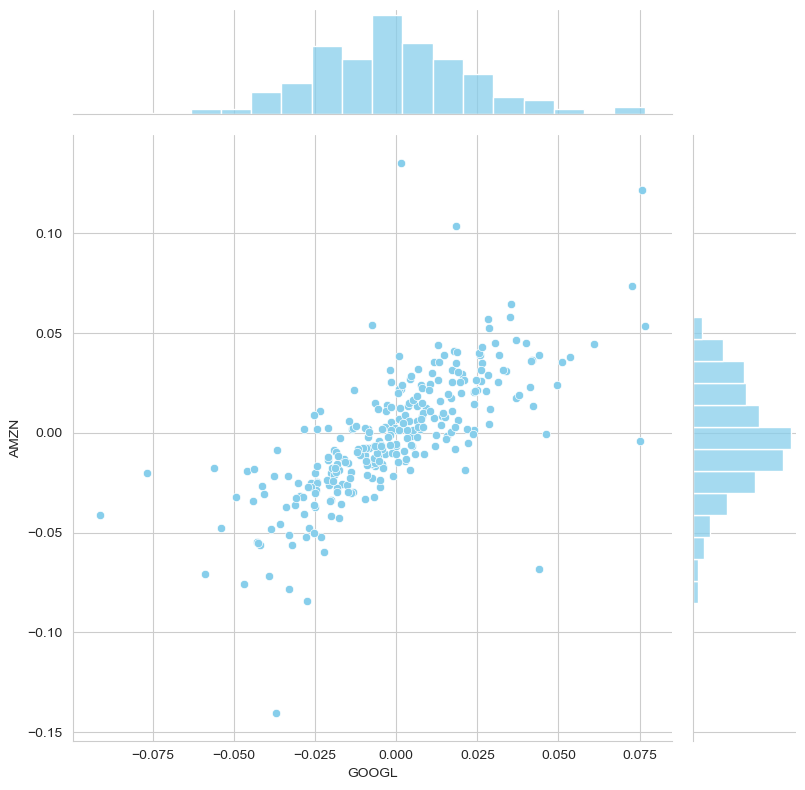

In [19]:
# We'll use joinplot to compare the daily returns of Google and Amazon.
sns.jointplot(data=tech_returns, x='GOOGL', y='AMZN', kind='scatter', color='skyblue', size=8)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


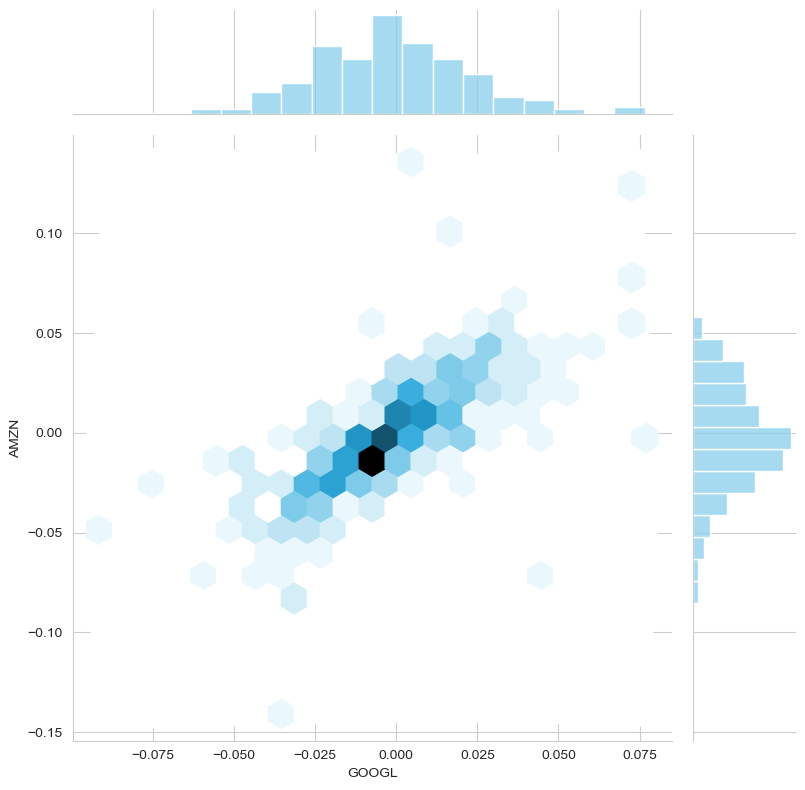

In [20]:
# With Hex plot
sns.jointplot(data=tech_returns, x='GOOGL',y='AMZN', kind='hex', color='skyblue', size=8)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


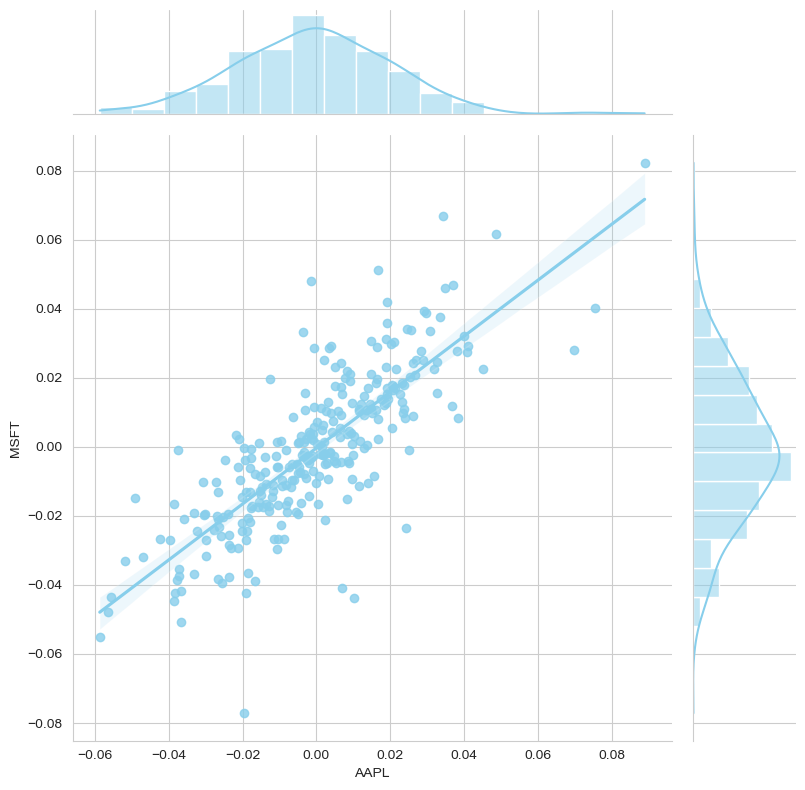

In [21]:
# Let's check out for Apple and Microsoft with reg jointplot
sns.jointplot('AAPL', 'MSFT', data=tech_returns, kind='reg', size=8, color='skyblue')

<AxesSubplot:>

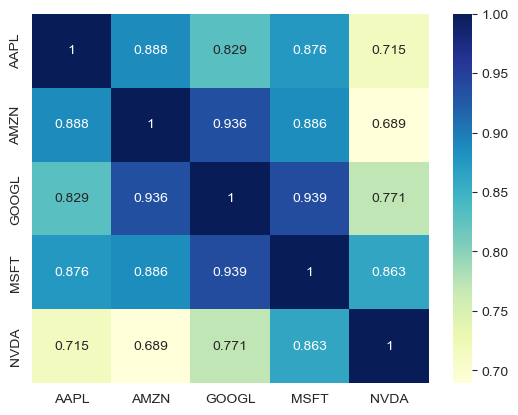

In [22]:
# Let's check put the correlation between closing prices of all stocks
sns.heatmap(closingprice_df.corr(), annot=True, fmt='.3g', cmap='YlGnBu')






Numerically and visually, Amazon and Google had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.